In [1]:
import numpy as np
import numpy.typing as npt
import pandas as pd

from sklearn.preprocessing import StandardScaler

import umap

/Users/ben/venv/py310/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ben/venv/py310/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ben/venv/py310/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

In [2]:
%load_ext rpy2.ipython

In [3]:
def run_umap(df: pd.DataFrame, nn: int=15, md: float=0.2, somr: float=0.25, nc: int=2) -> tuple[npt.NDArray[np.float64], umap.UMAP]:
    umapper = umap.UMAP(
        n_neighbors=nn,
        n_components=nc,
        min_dist=md,
        set_op_mix_ratio=somr,
        metric='euclidean',
        # UMAP figures change with every run if not seeded
        random_state=2023
    )

    return (umapper.fit_transform(df), umapper)

In [4]:
stops_tidy = pd.read_csv('../data/arist_corpus.csv',index_col=0)
stops_tidy

,Translator,Chunk,Work,Author,atqui,aut,autem,certe,ceu,confestim,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
0,Bur,duplici autem virtute existente hac quidem int...,EthV,Aristoteles,0.000000,0.062338,0.685717,0.0,0.0,0.0,...,0.207793,0.000000,0.0,0.000000,0.207793,0.041559,0.0,0.0,0.145455,0.0
1,Bur,malicia autem contrarium fiet autem nobis et e...,EthV,Aristoteles,0.000000,0.049793,0.813285,0.0,0.0,0.0,...,0.165977,0.000000,0.0,0.000000,0.016598,0.066391,0.0,0.0,0.066391,0.0
2,Bur,bene habentibus operis quoniam neque auferendu...,EthV,Aristoteles,0.000000,0.000000,0.896433,0.0,0.0,0.0,...,0.034478,0.000000,0.0,0.000000,0.091942,0.011493,0.0,0.0,0.045971,0.0
3,Bur,et medietas amicicia qui superhabundat autem q...,EthV,Aristoteles,0.000000,0.064567,0.774798,0.0,0.0,0.0,...,0.096850,0.000000,0.0,0.000000,0.080708,0.064567,0.0,0.0,0.032283,0.0
4,Bur,iacit volens in salute autem sui ipsius et rel...,EthV,Aristoteles,0.000000,0.150855,0.822845,0.0,0.0,0.0,...,0.013714,0.000000,0.0,0.000000,0.095999,0.123427,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,Anon,palam nec enim impar infinitus est nec par gen...,Metaph,Aristoteles,0.025294,0.328824,0.227648,0.0,0.0,0.0,...,0.126471,0.075883,0.0,0.075883,0.430001,0.000000,0.0,0.0,0.455295,0.0
1207,Anon,aut non quare eadem accident et sic aut enim n...,Metaph,Aristoteles,0.000000,0.298142,0.238514,0.0,0.0,0.0,...,0.089443,0.000000,0.0,0.000000,0.268328,0.000000,0.0,0.0,0.566471,0.0
1208,Anon,quidem potentia illud vero actu ergo potentia ...,Metaph,Aristoteles,0.000000,0.380143,0.253429,0.0,0.0,0.0,...,0.050686,0.000000,0.0,0.025343,0.456172,0.000000,0.0,0.0,0.481514,0.0
1209,Anon,tempori non finis est non etiam erit sempitern...,Metaph,Aristoteles,0.030331,0.242647,0.242647,0.0,0.0,0.0,...,0.060662,0.060662,0.0,0.000000,0.121324,0.000000,0.0,0.0,0.454963,0.0


In [5]:
stops_tidy = stops_tidy[stops_tidy.Translator != 'Myst'].reset_index(drop=True)
stops_tidy

,Translator,Chunk,Work,Author,atqui,aut,autem,certe,ceu,confestim,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
0,Bur,duplici autem virtute existente hac quidem int...,EthV,Aristoteles,0.000000,0.062338,0.685717,0.0,0.0,0.0,...,0.207793,0.000000,0.0,0.000000,0.207793,0.041559,0.0,0.0,0.145455,0.0
1,Bur,malicia autem contrarium fiet autem nobis et e...,EthV,Aristoteles,0.000000,0.049793,0.813285,0.0,0.0,0.0,...,0.165977,0.000000,0.0,0.000000,0.016598,0.066391,0.0,0.0,0.066391,0.0
2,Bur,bene habentibus operis quoniam neque auferendu...,EthV,Aristoteles,0.000000,0.000000,0.896433,0.0,0.0,0.0,...,0.034478,0.000000,0.0,0.000000,0.091942,0.011493,0.0,0.0,0.045971,0.0
3,Bur,et medietas amicicia qui superhabundat autem q...,EthV,Aristoteles,0.000000,0.064567,0.774798,0.0,0.0,0.0,...,0.096850,0.000000,0.0,0.000000,0.080708,0.064567,0.0,0.0,0.032283,0.0
4,Bur,iacit volens in salute autem sui ipsius et rel...,EthV,Aristoteles,0.000000,0.150855,0.822845,0.0,0.0,0.0,...,0.013714,0.000000,0.0,0.000000,0.095999,0.123427,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,Anon,palam nec enim impar infinitus est nec par gen...,Metaph,Aristoteles,0.025294,0.328824,0.227648,0.0,0.0,0.0,...,0.126471,0.075883,0.0,0.075883,0.430001,0.000000,0.0,0.0,0.455295,0.0
1188,Anon,aut non quare eadem accident et sic aut enim n...,Metaph,Aristoteles,0.000000,0.298142,0.238514,0.0,0.0,0.0,...,0.089443,0.000000,0.0,0.000000,0.268328,0.000000,0.0,0.0,0.566471,0.0
1189,Anon,quidem potentia illud vero actu ergo potentia ...,Metaph,Aristoteles,0.000000,0.380143,0.253429,0.0,0.0,0.0,...,0.050686,0.000000,0.0,0.025343,0.456172,0.000000,0.0,0.0,0.481514,0.0
1190,Anon,tempori non finis est non etiam erit sempitern...,Metaph,Aristoteles,0.030331,0.242647,0.242647,0.0,0.0,0.0,...,0.060662,0.060662,0.0,0.000000,0.121324,0.000000,0.0,0.0,0.454963,0.0


In [6]:
stops_tidy[stops_tidy.Work.str.startswith('Rhet')]

,Translator,Chunk,Work,Author,atqui,aut,autem,certe,ceu,confestim,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
311,Wil,rethorica assecutiva dialetice est ambe enim d...,Rhet,Aristoteles,0.0,0.319732,0.601848,0.000000,0.0,0.000000,...,0.037616,0.112847,0.0,0.000000,0.150462,0.150462,0.000000,0.0,0.018808,0.0
312,Wil,et eos qui non possunt recipere sanitatem tame...,Rhet,Aristoteles,0.0,0.207550,0.756074,0.000000,0.0,0.014825,...,0.044475,0.088950,0.0,0.014825,0.103775,0.000000,0.029650,0.0,0.029650,0.0
313,Wil,sunt pauca quidem necessaria ex quibus rethori...,Rhet,Aristoteles,0.0,0.131647,0.750390,0.000000,0.0,0.000000,...,0.039494,0.026329,0.0,0.039494,0.236965,0.039494,0.039494,0.0,0.026329,0.0
314,Wil,puta qui diiudicatur quomodo non fuerit factum...,Rhet,Aristoteles,0.0,0.410564,0.759544,0.000000,0.0,0.000000,...,0.000000,0.020528,0.0,0.000000,0.102641,0.143697,0.000000,0.0,0.000000,0.0
315,Wil,quare palam quod ad legislationem quidem terre...,Rhet,Aristoteles,0.0,0.448704,0.769207,0.000000,0.0,0.000000,...,0.048075,0.032050,0.0,0.000000,0.096151,0.048075,0.000000,0.0,0.016025,0.0
316,Wil,utique bene fortunatus permanebit est autem qu...,Rhet,Aristoteles,0.0,0.277868,0.719189,0.000000,0.0,0.000000,...,0.016345,0.016345,0.0,0.016345,0.196142,0.065381,0.032690,0.0,0.016345,0.0
317,Wil,omnes aut multi aut similes aut que minores di...,Rhet,Aristoteles,0.0,0.386769,0.520651,0.000000,0.0,0.000000,...,0.014876,0.014876,0.0,0.000000,0.089254,0.089254,0.000000,0.0,0.014876,0.0
318,Wil,voluntate cum enim velint existit magis qui fi...,Rhet,Aristoteles,0.0,0.216179,0.602213,0.000000,0.0,0.000000,...,0.015441,0.000000,0.0,0.000000,0.046324,0.108090,0.030883,0.0,0.015441,0.0
319,Wil,virtutis iustitia et fortitudo temperantia mag...,Rhet,Aristoteles,0.0,0.168852,0.731693,0.000000,0.0,0.000000,...,0.056284,0.037523,0.0,0.056284,0.093807,0.093807,0.018761,0.0,0.000000,0.0
320,Wil,prohibens hoc autem non prohibens transponatur...,Rhet,Aristoteles,0.0,0.291256,0.823115,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.063317,0.050653,0.000000,0.0,0.025327,0.0


In [45]:
stops_tidy['Arist'] =  stops_tidy.apply(lambda r: r.Author=='Aristoteles', axis=1)

In [10]:
feature_cols = stops_tidy.columns[4:]

In [13]:
ss = StandardScaler().fit(stops_tidy[feature_cols])

In [46]:
bar = stops_tidy[stops_tidy.Translator == "Bar"].copy()

bar_X = bar.drop(["Translator", "Work", "Chunk", "Author"], axis=1)
umap_cols, umapper = run_umap(
    StandardScaler().fit_transform(bar_X), md=0.1, nn=8, somr=0.75
)
bar.insert(2, "Y", umap_cols[:, 1])
bar.insert(2, "X", umap_cols[:, 0])

In addition: Warning message:
Using alpha for a discrete variable is not advised. 


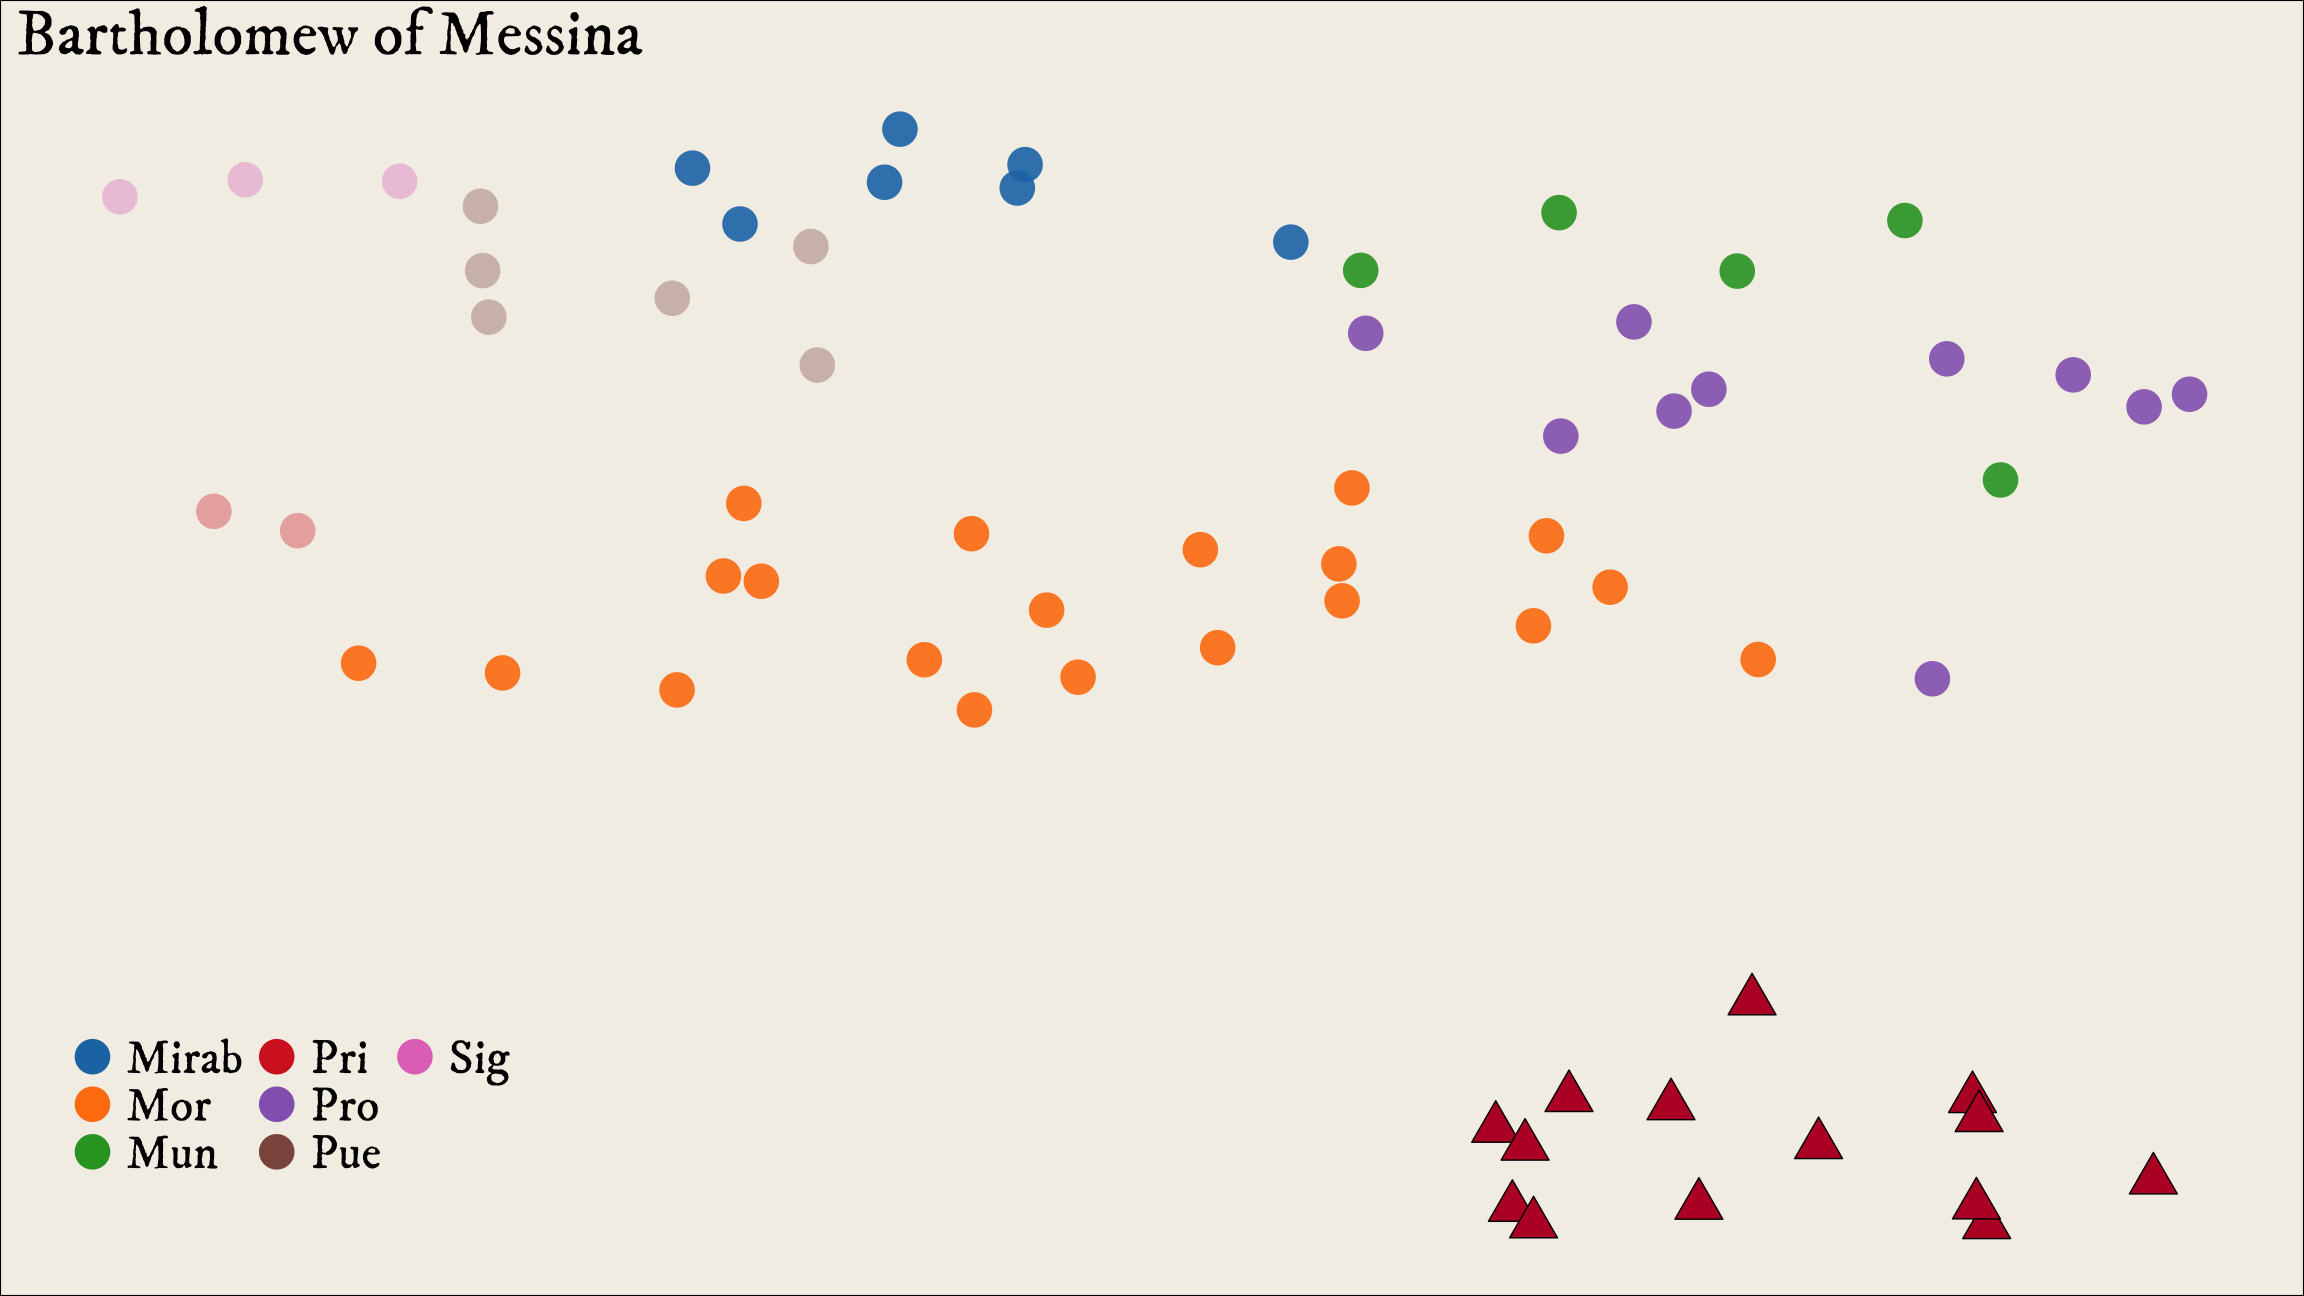

In [89]:
%%R -i bar -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
library(stringr)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8'
fgcol = 'black'

ggplot(data=bar, aes(x=X, y=Y)) +
geom_point(data=dplyr::filter(bar,str_detect(Work,'Rhet',negate=TRUE)),size=8, shape=16, aes(color=Work, alpha=Arist)) +
geom_point(data=dplyr::filter(bar,str_detect(Work,'Rhet')), size=8, shape=24, aes(fill=Work), alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s", guide = 'none') +
scale_alpha_discrete(range=c(0.35,0.9), guide='none') +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("Bartholomew of Messina") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=8,alpha=1)),
) +    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.12,0.15),
        legend.text=element_text(size=24),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_bar.pdf"
# ggsave(fn, dpi=300, width=16, height=9)

In [54]:
wil = stops_tidy[stops_tidy.Translator == "Wil"].copy()

wil_X = wil.drop(["Translator", "Work", "Chunk", "Author"], axis=1)
umap_cols, umapper = run_umap(
    StandardScaler().fit_transform(wil_X), md=0.2, nn=8, somr=0.75
)
wil.insert(2, "Y", umap_cols[:, 1])
wil.insert(2, "X", umap_cols[:, 0])

In addition: Warning message:
Using alpha for a discrete variable is not advised. 


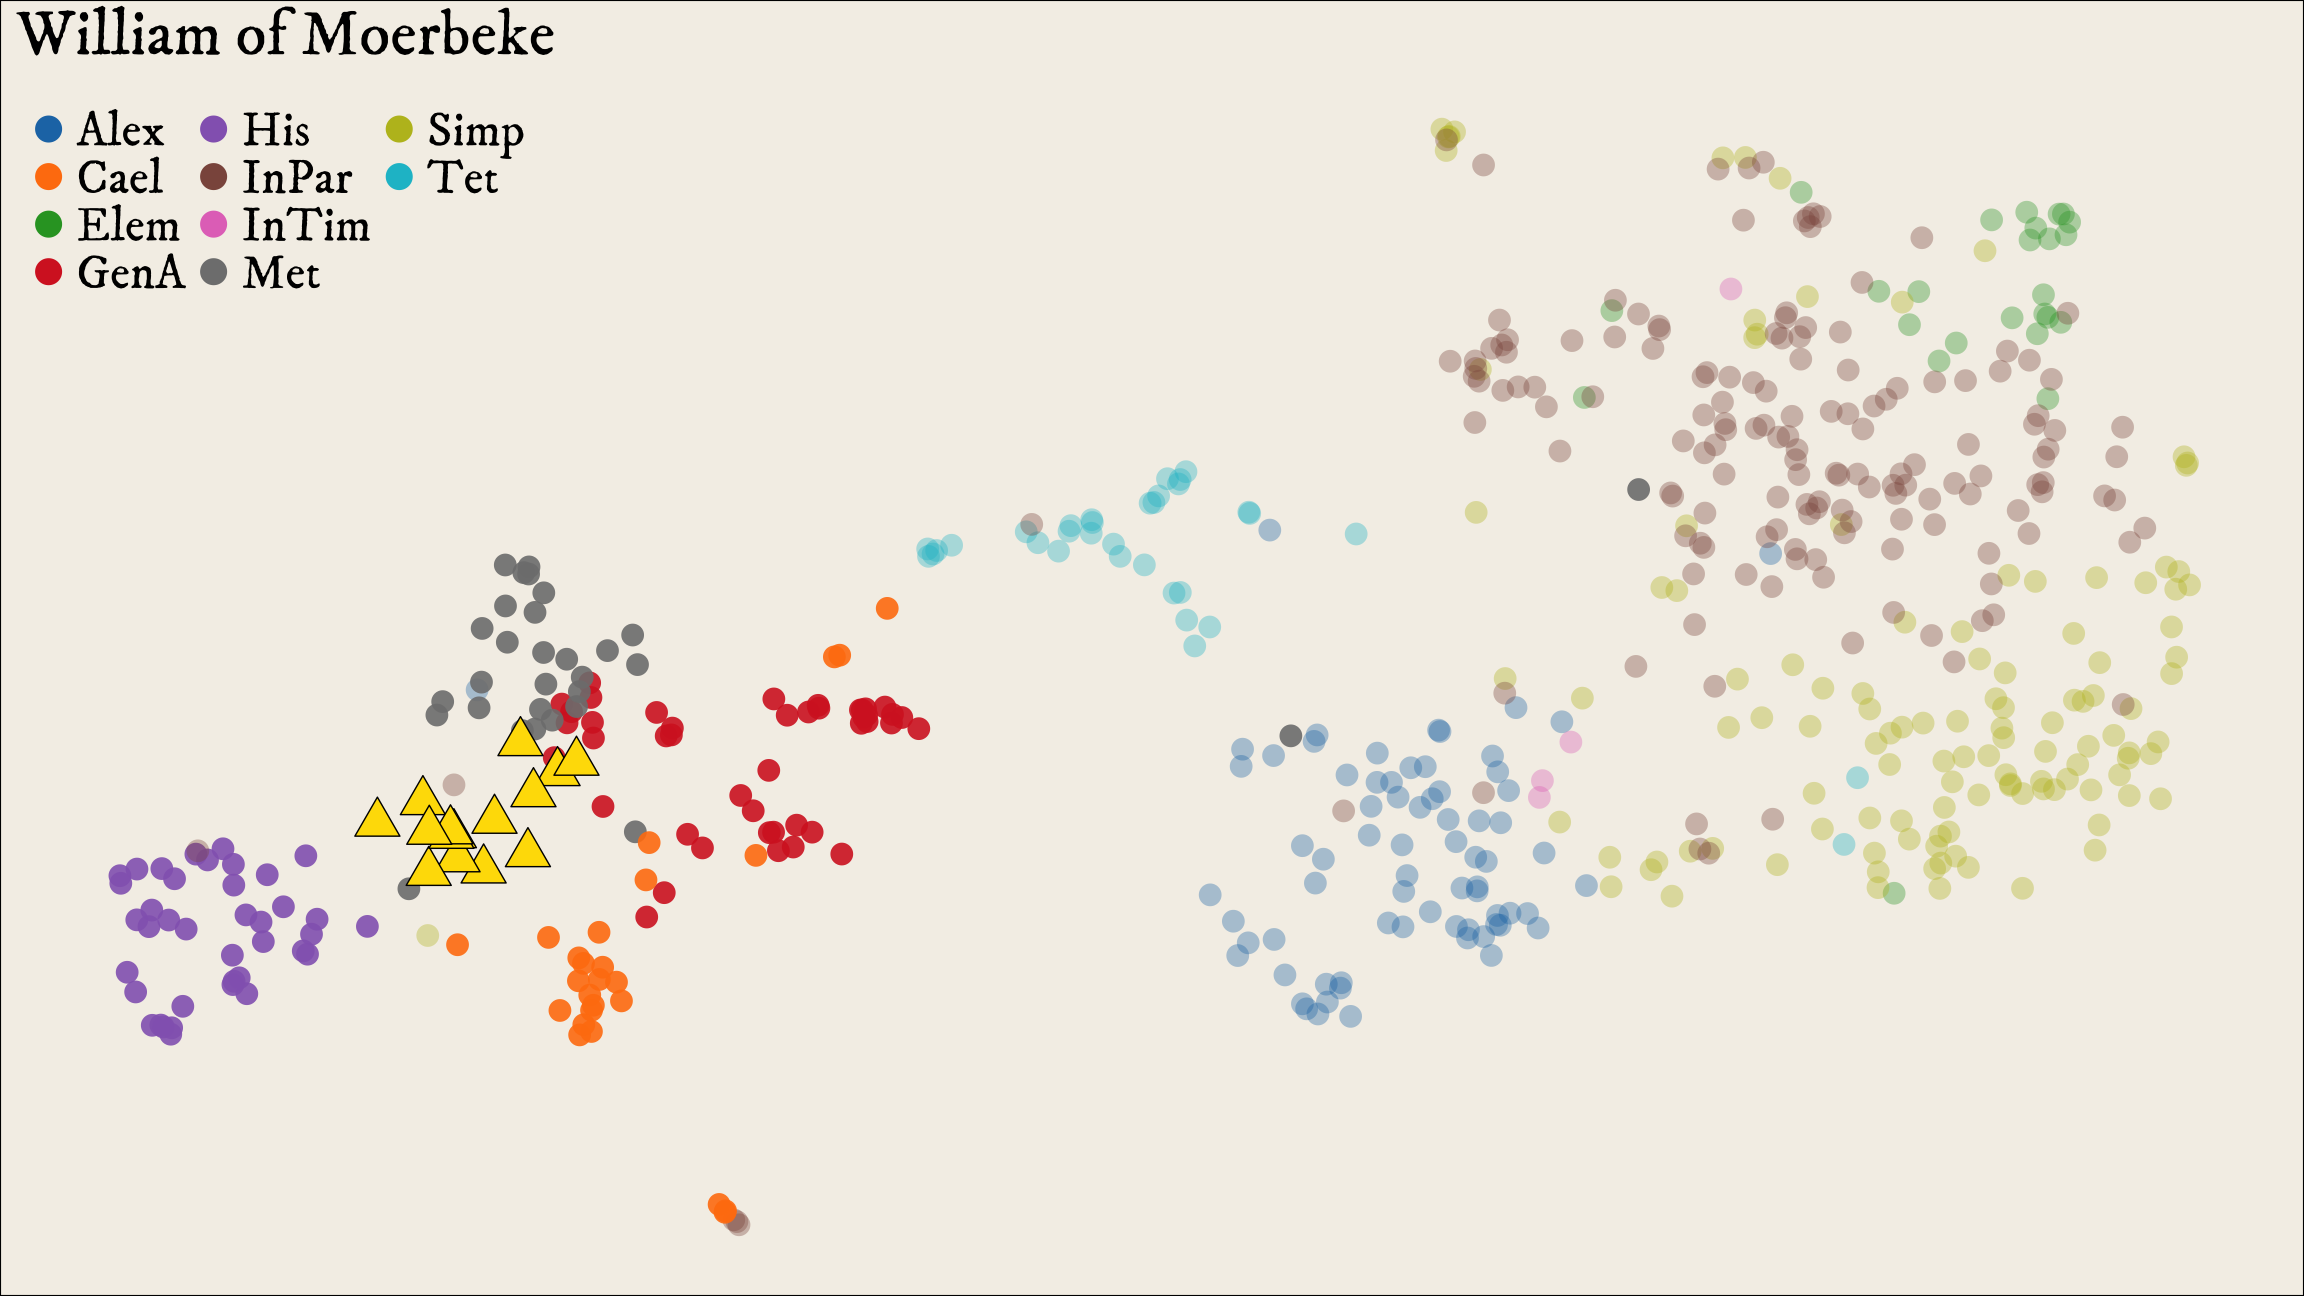

In [79]:
%%R -i wil -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
library(stringr)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8'
fgcol = 'black'

ggplot(data=wil, aes(x=X, y=Y)) +
geom_point(data=dplyr::filter(wil,str_detect(Work,'Rhet',negate=TRUE)),size=5, shape=16, aes(color=Work, alpha=Arist)) +
geom_point(data=dplyr::filter(wil,str_detect(Work,'Rhet')), size=7.5, shape=24, fill='#FEDD00FF', alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s", guide = 'none') +
scale_alpha_discrete(range=c(0.35,0.9), guide='none') +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("William of Moerbeke") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=6,alpha=1)),
) +    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.115,0.9),
        legend.text=element_text(size=24),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_wil.pdf"
# ggsave(fn, dpi=300, width=16, height=9)

In [56]:
all = stops_tidy.copy()

all_X = all.drop(["Translator", "Work", "Chunk", "Author"], axis=1)
ss = StandardScaler()
umap_cols, umapper = run_umap(ss.fit_transform(all_X), nc=2, nn=8, somr=0.5, md=0.4)
all.insert(2, "Y", umap_cols[:, 1])
all.insert(2, "X", umap_cols[:, 0])

In addition: Warning message:
Using alpha for a discrete variable is not advised. 


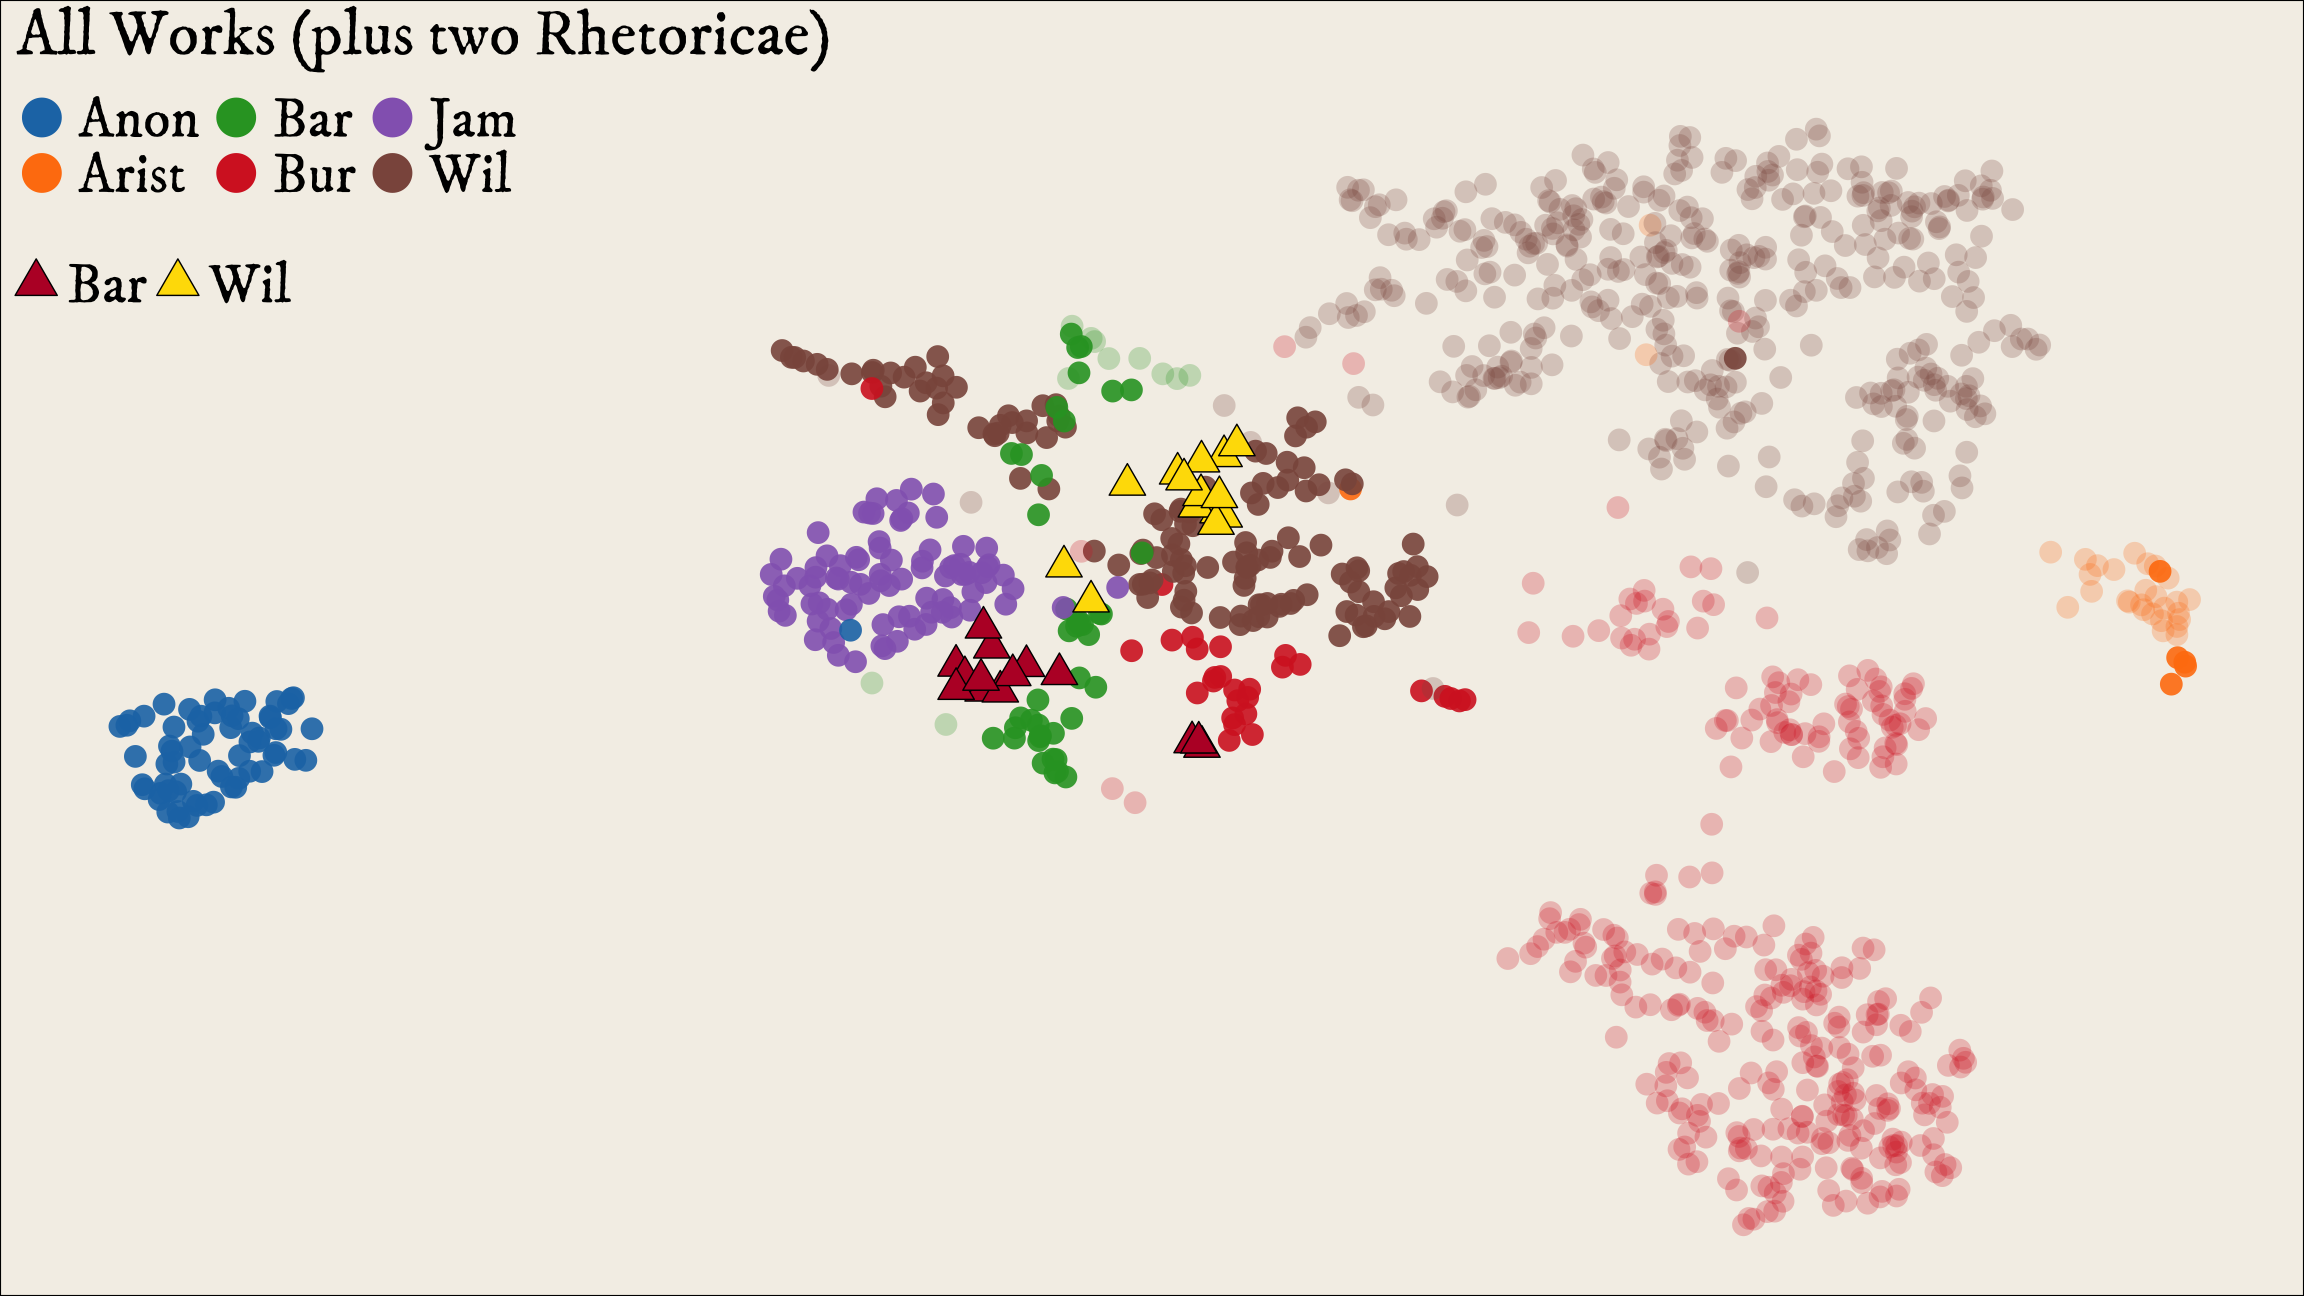

In [85]:
%%R -i all -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8' # antique paper
fgcol = 'black'

ggplot(data=all, aes(x=X, y=Y)) +
geom_point(data = dplyr::filter(all,str_detect(Work,'Rhet',negate=TRUE)),size=5, shape=16, aes(color=Translator,alpha=Arist)) +
geom_point(data=dplyr::filter(all,str_detect(Work,'Rhet')), size=6, shape=24, aes(fill=Translator), alpha=1) +

theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s") +
scale_alpha_discrete(range=c(0.25,0.9), guide='none') +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("All Works (plus two Rhetoricae)") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=9,alpha=1)),
    fill = guide_legend(ncol=2,override.aes =list(size=7,alpha=1))
) +
    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.11,0.9),
        legend.text=element_text(size=28),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_all.pdf"
# ggsave(fn, dpi=300, width=16, height=9)

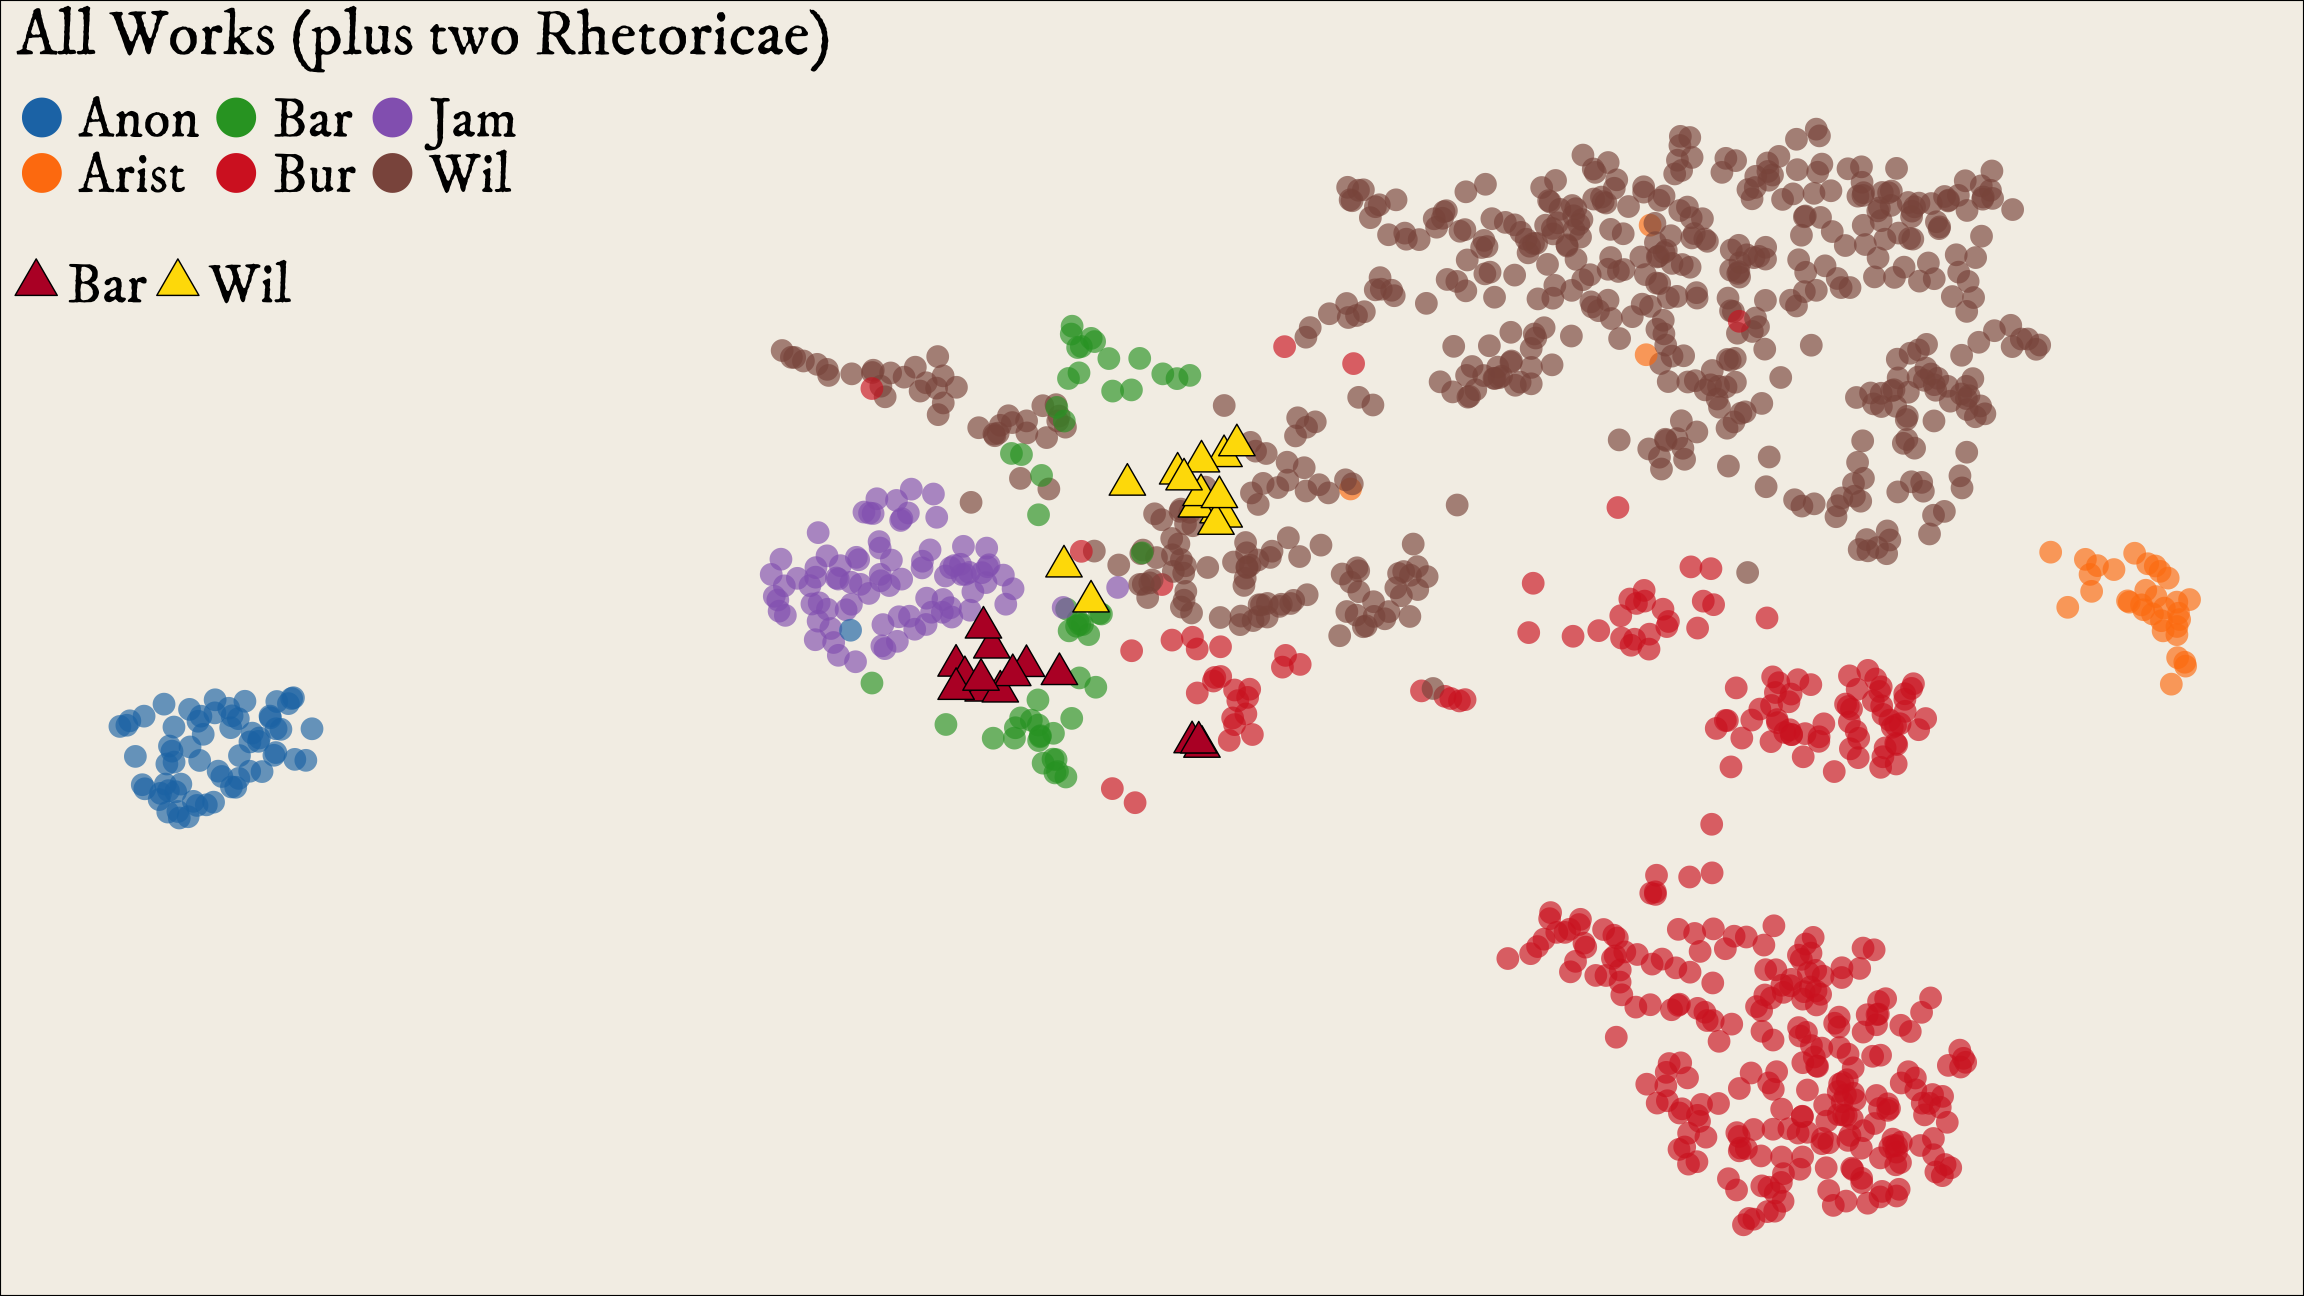

In [87]:
%%R -i all -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8' # antique paper
fgcol = 'black'

ggplot(data=all, aes(x=X, y=Y)) +
geom_point(data = dplyr::filter(all,str_detect(Work,'Rhet',negate=TRUE)),size=5, alpha=0.65, shape=16, aes(color=Translator)) +
geom_point(data=dplyr::filter(all,str_detect(Work,'Rhet')), size=6, shape=24, aes(fill=Translator), alpha=1) +

theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s") +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("All Works (plus two Rhetoricae)") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=9,alpha=1)),
    fill = guide_legend(ncol=2,override.aes =list(size=7,alpha=1))
) +
    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.11,0.9),
        legend.text=element_text(size=28),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_all.pdf"
# ggsave(fn, dpi=300, width=16, height=9)